Done with GA


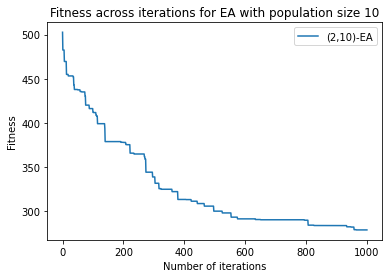

Done with GA
Done with GA


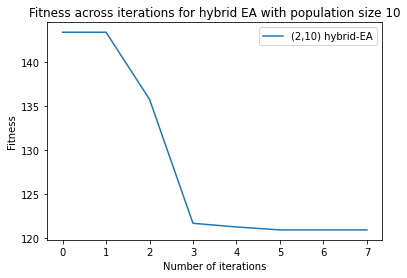

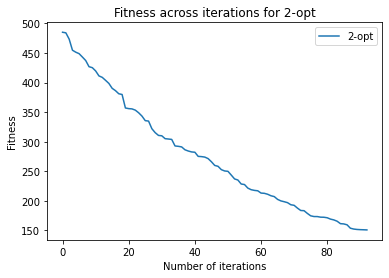

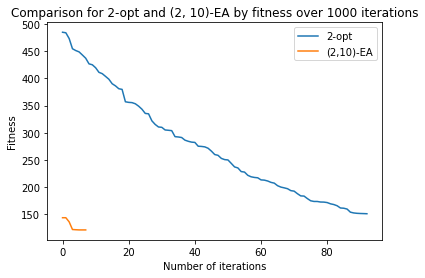

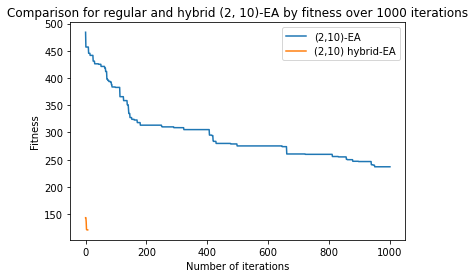

In [41]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
#print(os.getcwd())
#os.chdir(os.environ["HOME"]+"/natural-computing/assignment-1/")

def dist(node1, node2): 
    """Euclidean distance measure for nodes in TSP graph"""
    return math.sqrt((node1[0]-node2[0])**2+(node1[1]-node2[1])**2)

def fitness(ind):
    """Fitness of individual ind, computed by summing Euclidean distances between
    pairs of nodes."""
    total_dist = 0
    for i in range(1,  len(ind)):
        total_dist += dist(ind[i-1], ind[i])
    return total_dist

def mutate(ind):
    "Switch genes of individual at random indices"
    length = len(ind)
    p = np.random.randint(0, length)
    q = np.random.randint(0, length)
    ind[[p,q]] = ind[[q,p]]
    return ind

def crossover(ind1, ind2):
    """Perform random crossover operation between ind1 and ind2"""
    #@TODO: implement looparound
    length = len(ind1)
    p = np.random.randint(1, length)   
    q = np.random.randint(p, length)
    # Ensure q > p
    
    cross1 = ind2[p:q]  # Slice crossover section
    cross2 = ind1[p:q]

    add1 = np.array([n.tolist() for n in ind2 if n.tolist() not in cross1.tolist()]) # Get all genes in parent that are not in crossover part
    add2 = np.array([n.tolist() for n in ind1 if n.tolist() not in cross2.tolist()])
    
    
    child1 = np.vstack((add1[:p], cross1, add1[p:]))  # Add parent genes to crossover in order
    child2 = np.vstack((add2[:p], cross2, add2[p:])) 
        
    return child1, child2
    
def n_opt(problem):
    """Apply n-opt to the problem. 
    Loop 3 steps until some threshold is reached:
        1. Slice list into 3 parts
        2. Combine parts, reversing the middle
        3. If new list is better than old list, restart procedure. 
    """
    fitness_list = []
    solution = problem
    new_distance = 0
    best_distance = fitness(solution)
    fitness_list.append(best_distance)
    diff = math.inf
    while diff > 0:   # Loop until convergence
        for p in range(len(solution)):
            for q in range(len(solution)):
                # Decide how to recombine
                part1 = solution[:p]
                part2 = np.flip(solution[p:q], axis = 0)
                part3 = solution[q:]
                arr = np.array([part1, part2, part3], dtype="object")
                new_solution = np.vstack((part1, part2, part3))
                new_distance = fitness(new_solution)
                diff = best_distance - new_distance
                if fitness(new_solution) < fitness(solution):
                    best_distance = new_distance
                    fitness_list.append(best_distance)
                    solution = new_solution
    return fitness_list

def meme(solution):
    """Apply n-opt to the problem. 
    Loop 3 steps until some threshold is reached:
        1. Slice list into 3 parts
        2. Combine parts, reversing the middle
        3. If new list is better than old list, restart procedure. 
    """
    new_distance = 0
    best_distance = fitness(solution)
    #fitness_list.append(best_distance)
    diff = math.inf
    while diff > 1:   # Loop until convergence
        for p in range(len(solution)):
            for q in range(len(solution)):
                # Decide how to recombine
                part1 = solution[:p]
                part2 = np.flip(solution[p:q], axis = 0)
                part3 = solution[q:]
                arr = np.array([part1, part2, part3], dtype="object")
                new_solution = np.vstack((part1, part2, part3))
                new_distance = fitness(new_solution)
                diff = best_distance - new_distance
                if fitness(new_solution) < fitness(solution):
                    best_distance = new_distance
                    solution = new_solution
                    #return solution
    return solution
    
def run_ea(problem, pop_size = 2, ngen =2000, run_memetic=True):
    candidates = []
    mutation_prob = 0.05
    fitness_list = []
    for i in range(pop_size):
        candidate = np.random.permutation(problem)
        if run_memetic:
            candidate = meme(candidate)
        candidates.append(candidate)
    
    best_fitness = fitness(candidates[0])
    new_fitness = 0
    if run_memetic:
        fitness_list.append(best_fitness)
        diff = best_fitness - new_fitness
        condition = diff > 0
    else:
        j = 0
        condition = j < ngen
        
    while condition:
        c_sort = sorted(candidates, key=lambda x: fitness(x), reverse=False)
        c_sort = c_sort[:2]
        new_fitness = fitness(c_sort[0]) 
        fitness_list.append(best_fitness)
        
        if run_memetic: 
            condition = diff > 0
            diff = best_fitness-new_fitness
        else:
            j += 1
            condition = j < ngen

        # Allow best 2 parents to procreate
        parent1 = c_sort[0]
        parent2 = c_sort[1]
        candidates = []
        for i in range(int(pop_size/2)):
            child1, child2 = crossover(parent1, parent2)
            if np.random.random() < mutation_prob:
                child1 = mutate(child1)
            if np.random.random() < mutation_prob:
                child2 = mutate(child2)
            if run_memetic:
                child1 = meme(child1)
                child2 = meme(child2)
                
            candidates.append(child1)
            candidates.append(child2)
        best_fitness = new_fitness
            
    c_sort = sorted(candidates, key=lambda x: fitness(x), reverse=False)
    fitness_list.append(fitness(c_sort[0]))
    print("Done with GA")
    return fitness_list

with open("file-tsp.txt") as file:
    nodes = [line.strip().split() for line in file]
    nodes = np.array([np.array(tuple(map(float, node))) for node in nodes])

# Initialize some useful variables
ngen = 1000
pop_size = [2, 5, 10, 20]

# Create plots
## GA as specified in lecture
problem = np.random.permutation(nodes)
# for p in pop_size:
plt.plot(run_ea(problem, pop_size=10, ngen=ngen, run_memetic=False), label = f"(2,10)-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for EA with population size 10")
plt.legend()
plt.show()

## GA as specified in lecture
problem = np.random.permutation(nodes)

ea = run_ea(problem, pop_size=10, ngen=ngen, run_memetic=False)
hybrid = run_ea(problem, pop_size=10, ngen=ngen)
opt = n_opt(problem)

# for p in pop_size:
plt.plot(hybrid, label = f"(2,10) hybrid-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for hybrid EA with population size 10")
plt.legend()
plt.show()

## 2-opt
plt.plot(opt, label="2-opt")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for 2-opt")
plt.legend()
plt.show()

## Comparison
plt.plot(opt, label="2-opt")
plt.plot(hybrid, label = "(2,10)-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Comparison for 2-opt and (2, 10)-EA by fitness over {ngen} iterations")
plt.legend()
plt.show() 

plt.plot(ea, label = "(2,10)-EA")
plt.plot(hybrid, label = "(2,10) hybrid-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Comparison for regular and hybrid (2, 10)-EA by fitness over {ngen} iterations")
plt.legend()
plt.show()

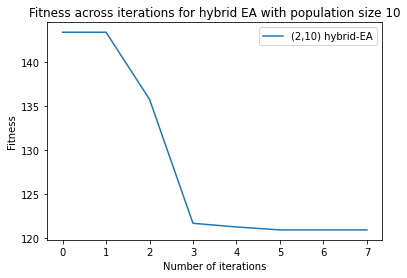

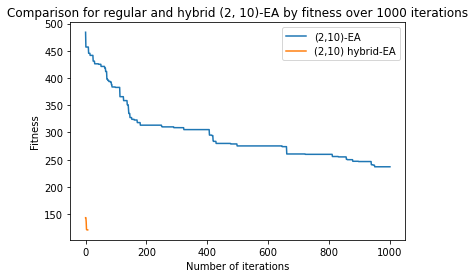

In [42]:
plt.plot(hybrid, label = f"(2,10) hybrid-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for hybrid EA with population size 10")
plt.legend()
plt.show()

plt.plot(ea, label = "(2,10)-EA")
plt.plot(hybrid, label = "(2,10) hybrid-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Comparison for regular and hybrid (2, 10)-EA by fitness over {ngen} iterations")
plt.legend()
plt.show()

(29, 2)
Done with GA
Done with GA


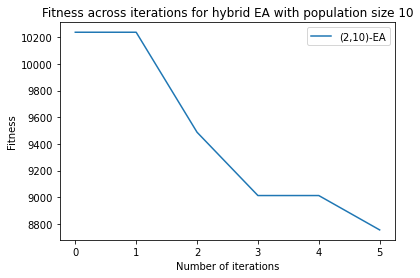

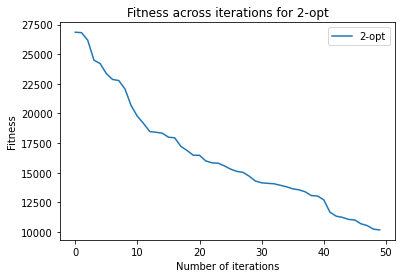

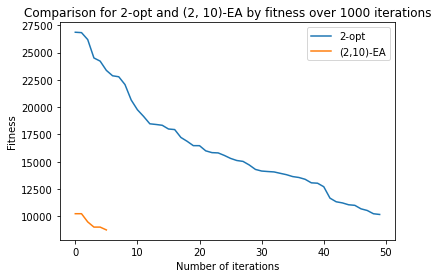

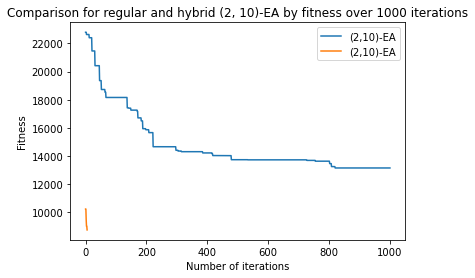

In [39]:
### Performance on small set of own choice
with open("bayern.txt") as file:
    nodes = []
    for line in file:
        nodes.append(line.strip().split())
    nodes = np.array([np.array(tuple(map(float, node))) for node in nodes])

print(nodes.shape)
# Initialize some useful variables
ngen = 1000
pop_size = [2, 5, 10, 20]

# Create plots
problem = np.random.permutation(nodes)

ea = run_ea(problem, pop_size=10, ngen=ngen, run_memetic=False)
hybrid = run_ea(problem, pop_size=10, ngen=ngen)
opt = n_opt(problem)

# for p in pop_size:
plt.plot(hybrid, label = f"(2,10)-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for hybrid EA with population size 10")
plt.legend()
plt.show()

## 2-opt
plt.plot(opt, label="2-opt")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for 2-opt")
plt.legend()
plt.show()

## Comparison
plt.plot(opt, label="2-opt")
plt.plot(hybrid, label = "(2,10)-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Comparison for 2-opt and (2, 10)-EA by fitness over {ngen} iterations")
plt.legend()
plt.show() 

plt.plot(ea, label = "(2,10)-EA")
plt.plot(hybrid, label = "(2,10)-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Comparison for regular and hybrid (2, 10)-EA by fitness over {ngen} iterations")
plt.legend()
plt.show()

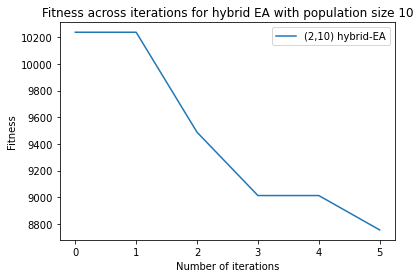

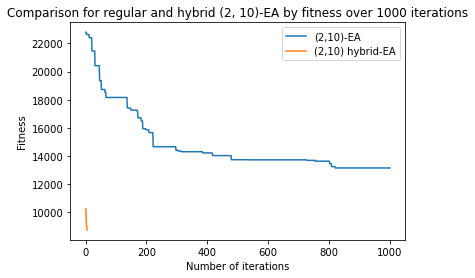

In [40]:
plt.plot(hybrid, label = f"(2,10) hybrid-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Fitness across iterations for hybrid EA with population size 10")
plt.legend()
plt.show()

plt.plot(ea, label = "(2,10)-EA")
plt.plot(hybrid, label = "(2,10) hybrid-EA")
plt.xlabel("Number of iterations")
plt.ylabel("Fitness")
plt.title(f"Comparison for regular and hybrid (2, 10)-EA by fitness over {ngen} iterations")
plt.legend()
plt.show()